In the "Binary Trees" file, we implemented binary search trees. A binary search tree is a binary tree wherein the values on the left subtree are smaller than the node value, and the values on the right subtree are bigger than the node value:

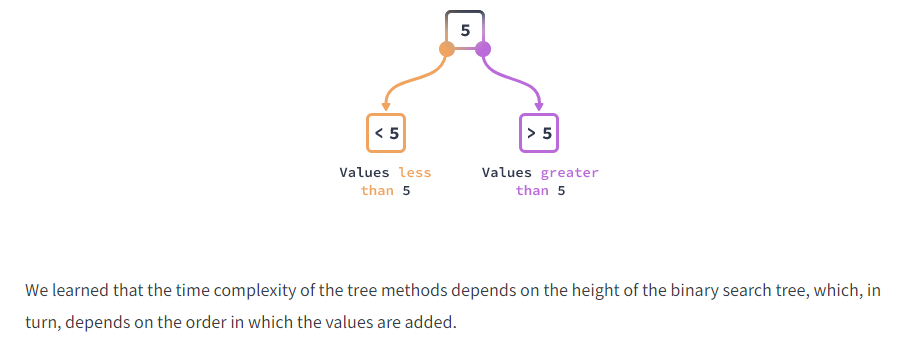

In the worst case, the height will be proportional to the number of values in the tree, making it no better than a list. In the best case, it can be proportional to the logarithm of the number of values. For some perspective, with one million values, the best-case height is only about 20. In this case, we only need to look at 20 nodes to look up a value, even though there are one million values.

The goal of this file is to change the tree implementation so that its height is always logarithmic, no matter the order in which values are inserted.

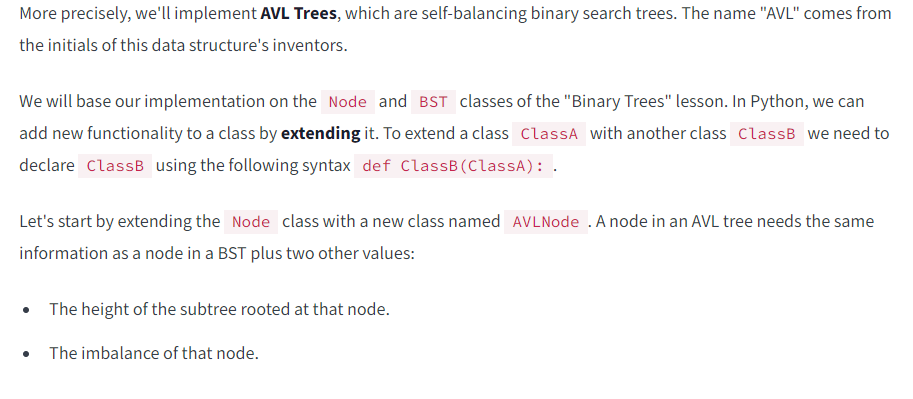

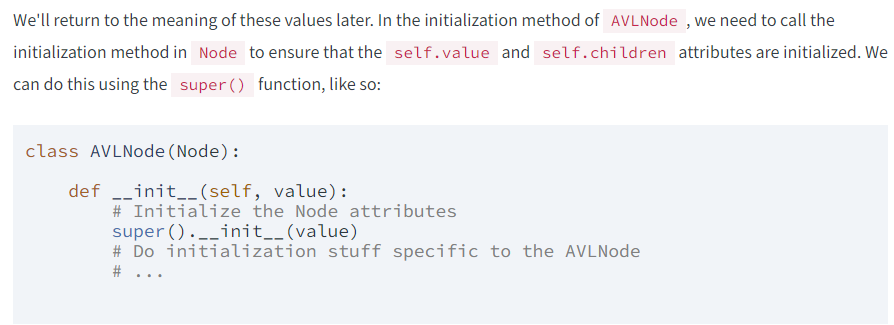

Let's complete this implementation by initializing the two new parameters mentioned above.

**Task**

The Node and BST classes from the previous file are available 

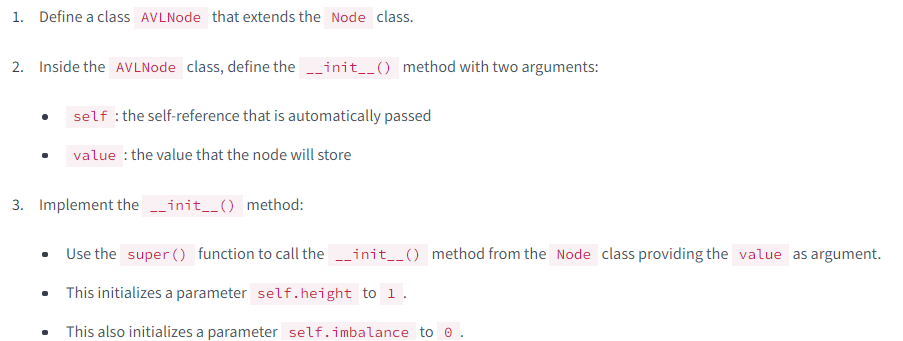

**Answer**

In [8]:
from bst import Node, BST
class AVLNode(Node):
    
    def __init__(self, value):
        super().__init__(value)
        self.height = 1
        self.imbalance = 0

Above we implemented the class that we'll use to represent nodes in an AVL tree. These nodes store two extra values:

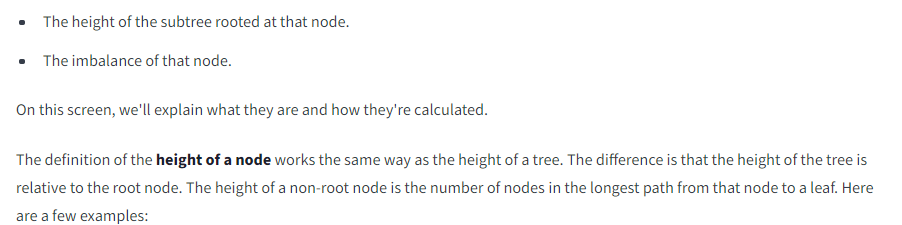

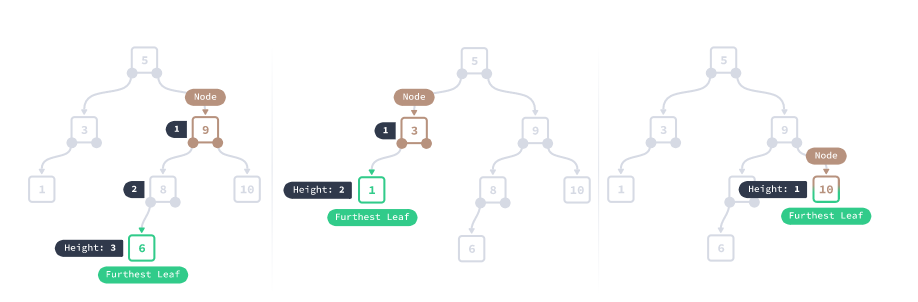

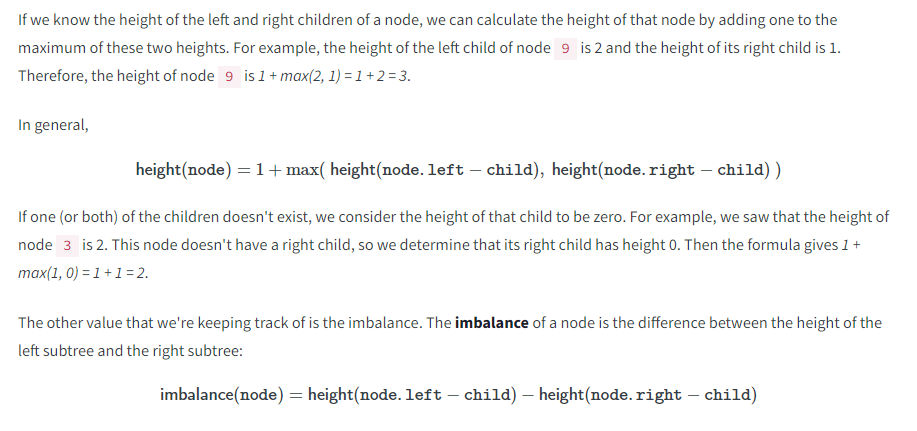

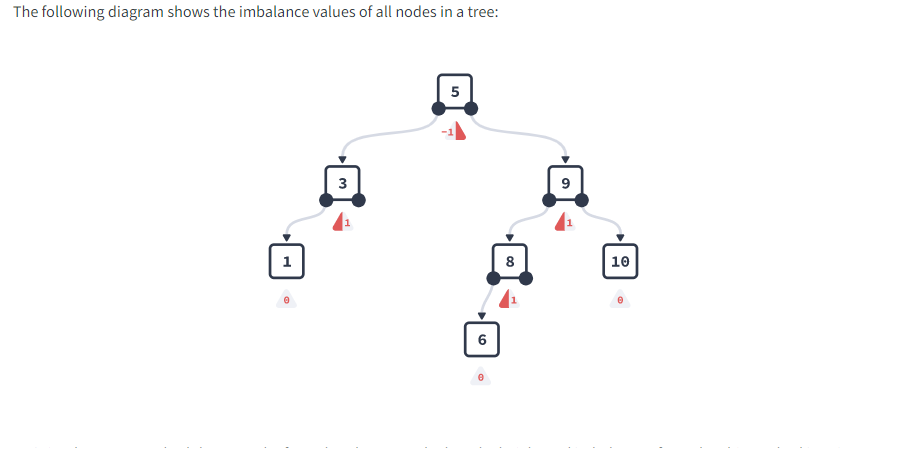

Let's implement a method that uses the formulas above to calculate the height and imbalance of a node. This method is going to assume that we know the heights of the left and right children. We'll make sure that this is true later.

**Task**

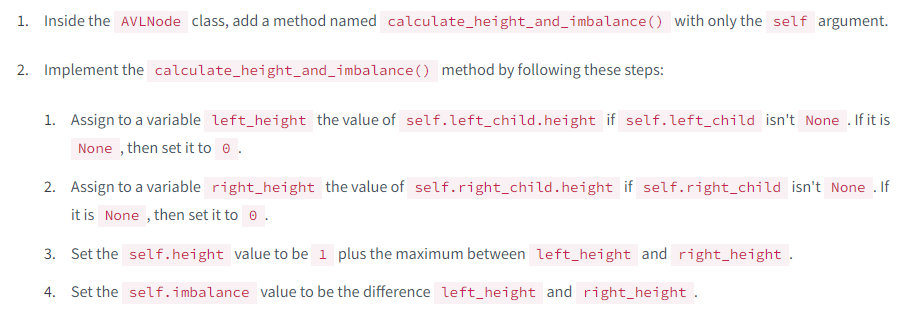

**Answer**

In [9]:
class AVLNode(Node):
    
    def __init__(self, value):
        super().__init__(value)
        self.height = 1
        self.imbalance = 0
        
    def calculate_height_and_imbalance(self):
        
        # Calculate left height
        left_height = 0
        if self.left_child is not None:
            left_height = self.left_child.height
            
        # Calculate right height
        right_height = 0
        if self.right_child is not None:
            right_height = self.right_child.height
            
        # Use formulas to calculate height and imbalance
        self.height = 1 + max(left_height, right_height)
        self.imbalance = left_height - right_height

Above we gave nodes the ability to calculate their height and imbalance provided that the height of their children is calculated.

The height of a node can only change when we add a new value. Therefore, we need to modify the `_add_recursive()` method that we implemented in the "Binary Trees" file to ensure that the height and imbalance values remain updated.

On this file, we're going to start implementing the `AVLTree` class, which will represent our AVL tree. In the same way that the `AVLNode` extends the `Node` class, the `AVLTree` class will extend the `BST` class because most of the functionality is the same.

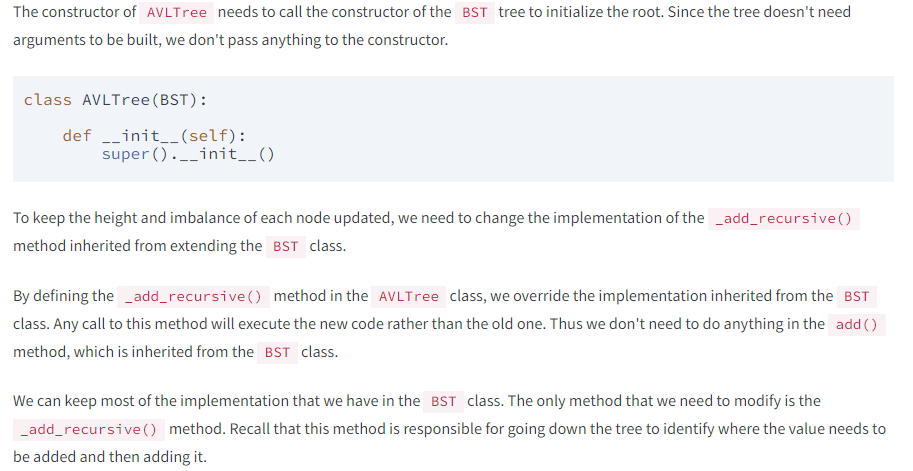

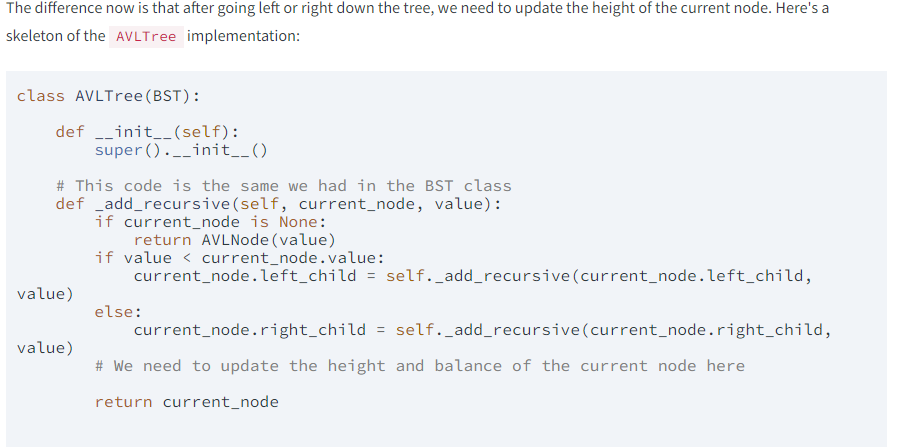

We need to add code at the end of the `_add_recursive()` method to update the height and imbalance value of `current_node`. Fortunately, we already implemented a method for this above.

We'll also add a new `get_height()` method that returns the height of the whole tree.

**Task**

We've provided with the partial implementation for the `AVLTree`. Let's finish implementing it by updating the height and imbalance of the current node.

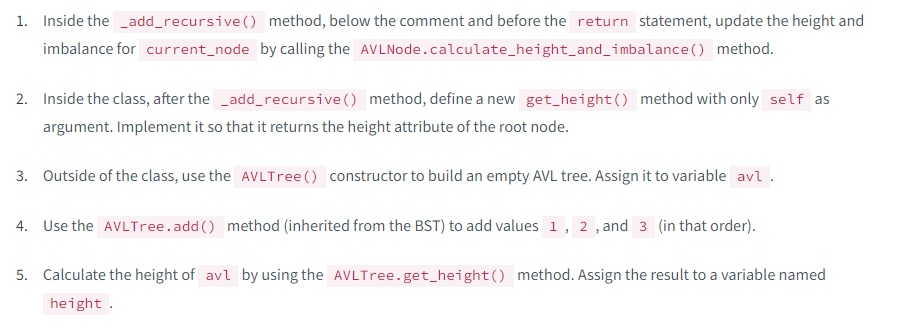

**Answer**

In [10]:
class AVLTree(BST):
    
    def __init__(self):
        super().__init__()
        
    def _add_recursive(self, current_node, value):
        if current_node is None:
            return AVLNode(value)
        if value <= current_node.value:
            current_node.left_child = self._add_recursive(current_node.left_child, value)
        else:
            current_node.right_child = self._add_recursive(current_node.right_child, value)
            
        # Calculate the height and balance of the current node
        current_node.calculate_height_and_imbalance() # Instruction 1
        return current_node
        
    def get_height(self): # Instruction 2
        return self.root.height
    
# Test the implementation

avl = AVLTree() # Instruction 3
avl.add(1) # Instruction 4
avl.add(2)
avl.add(3)
height = avl.get_height() # Instruction 5

We now have a binary search tree that correctly keeps track of node heights and imbalance. We can use this information to make sure that the tree remains balanced.

To do so, let's first understand the relationship between the height of the tree and the imbalance of a node.

As the name suggests, the imbalance of a node measures the degree of imbalance of the left and right subtrees of a node. If the imbalance is zero, it means that the left and right subtree have the same height. If the imbalance is positive, it means the tree is leaning to the left. If the imbalance is negative, it means that the tree is leaning to the right.

The following figure illustrates this:

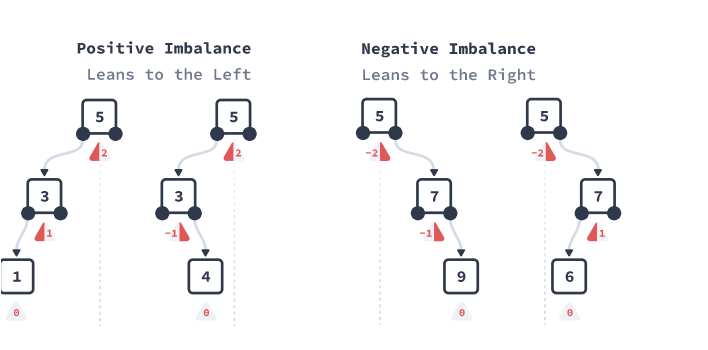

We've learned that the overall height of the tree relates directly to how evenly nodes are spread. If all nodes lean on the same side, the tree will be very tall. On the other hand, if nodes are evenly spread on the left and the right, the tree will be much shorter:

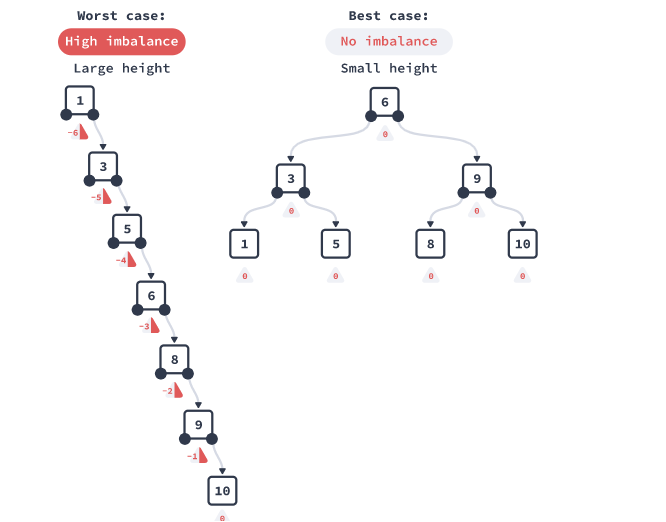

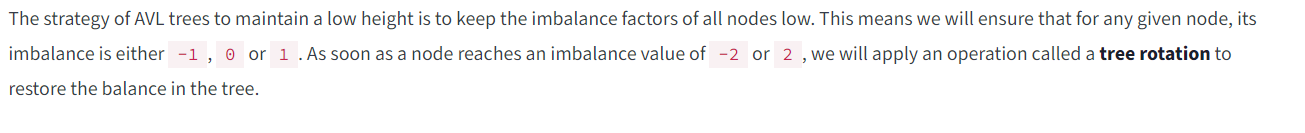

To automatically maintain a balanced tree as we insert values, we will implement two methods that rearrange the nodes in the tree.

Above, we'll implement the first of them, which we call a **left rotation**. The following diagram illustrates the left rotation of `node`:

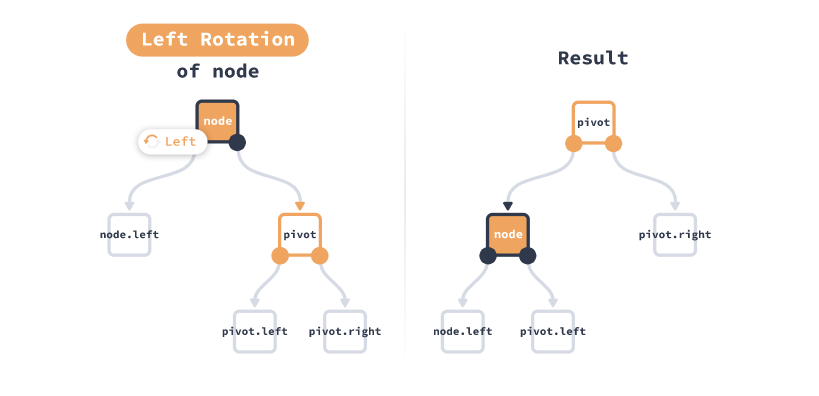

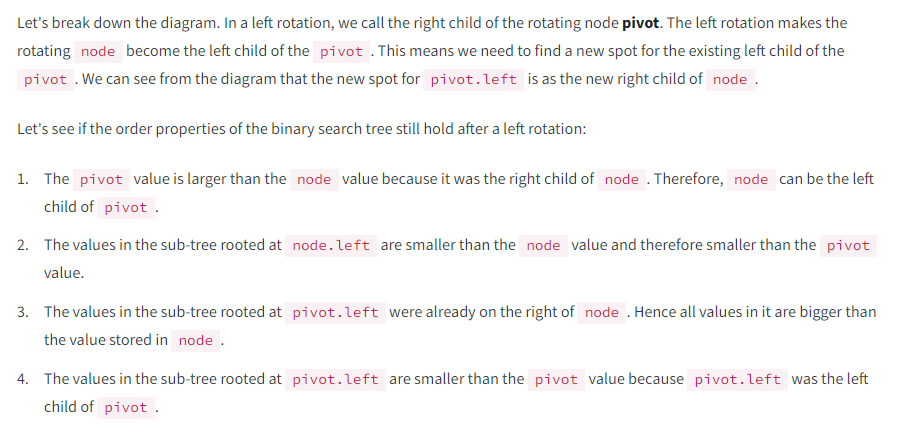

Let's implement a method that performs a left rotation on a node. We'll name the method _rotate_left. We use an underscore to hint at users of our `AVLTree` class that this method is meant for **internal** use only. This doesn't prevent them from calling the method, but it helps prevent it.

Note that when we perform a left rotation, the height and imbalance of `node` and `pivot` might change. Therefore, we need to update them after the rotation.

**Task**

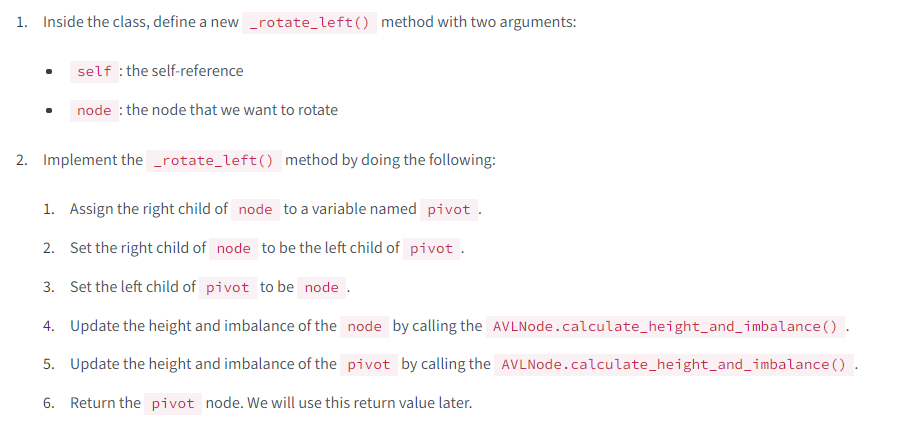

**Answer**

In [11]:
class AVLTree(BST):
    
    def __init__(self):
        super().__init__()
        
    def _add_recursive(self, current_node, value):
        if current_node is None:
            return AVLNode(value)
        if value <= current_node.value:
            current_node.left_child = self._add_recursive(current_node.left_child, value)
        else:
            current_node.right_child = self._add_recursive(current_node.right_child, value)
        current_node.calculate_height_and_imbalance() 
        return current_node
        
    def get_height(self):
        return self.root.height
    
    def _rotate_left(self, node):
        pivot = node.right_child
        node.right_child = pivot.left_child
        pivot.left_child = node
        node.calculate_height_and_imbalance()
        pivot.calculate_height_and_imbalance()
        return pivot

Above we implemented left rotations. Now we'll learn about right rotations. Later we'll see how these rotations can help maintain binary search tree balance.

The right rotation is analogous to the left rotation. The difference now is that the pivot is the left child of the rotating node, and the rotating node becomes the right child of the pivot:

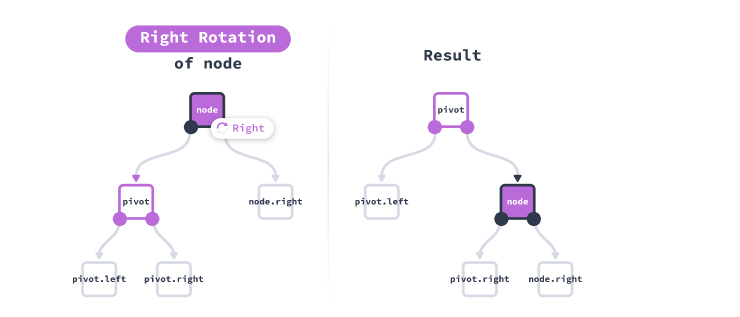

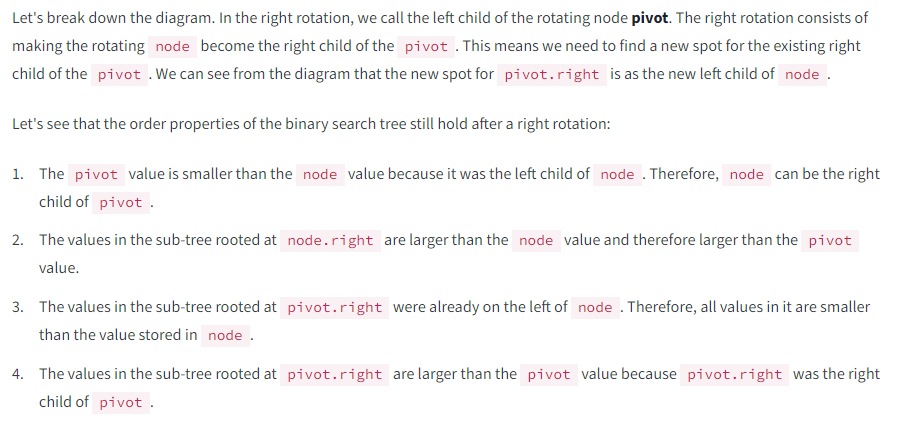

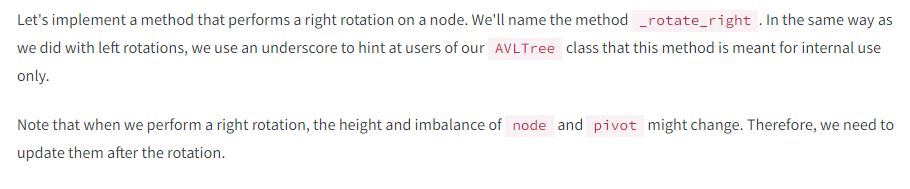

**Task**

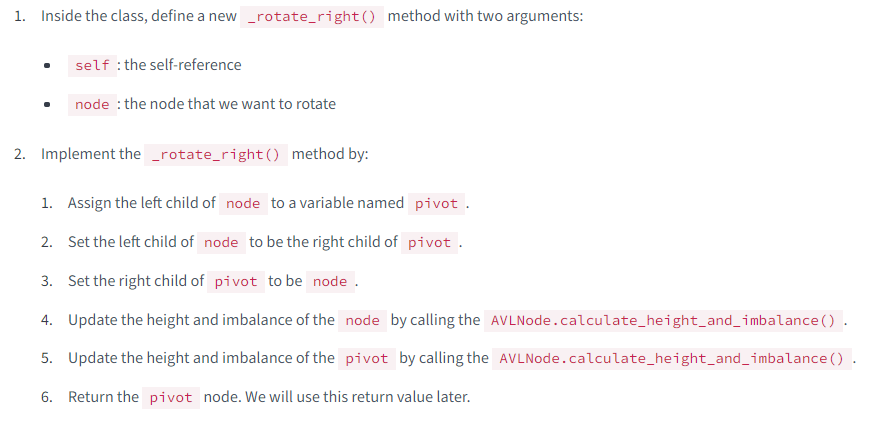

**Answer**

In [12]:
class AVLTree(BST):
    
    def __init__(self):
        super().__init__()
        
    def _add_recursive(self, current_node, value):
        if current_node is None:
            return AVLNode(value)
        if value <= current_node.value:
            current_node.left_child = self._add_recursive(current_node.left_child, value)
        else:
            current_node.right_child = self._add_recursive(current_node.right_child, value)
        current_node.calculate_height_and_imbalance() 
        return current_node
        
    def get_height(self):
        return self.root.height
    
    def _rotate_left(self, node):
        pivot = node.right_child
        node.right_child = pivot.left_child
        pivot.left_child = node
        node.calculate_height_and_imbalance()
        pivot.calculate_height_and_imbalance()
        return pivot
    
    def _rotate_right(self, node):
        pivot = node.left_child
        node.left_child = pivot.right_child
        pivot.right_child = node
        node.calculate_height_and_imbalance()
        pivot.calculate_height_and_imbalance()
        return pivot

Great success! We can now perform left and right node rotations. But how exactly does it help us balance the tree?

We've mentioned that our strategy for balancing the tree is to keep the imbalance of a node to -1, 0, or 1. To do so, when we add a new value to the tree, after we update the height and imbalance of the node, we will check whether it became 2 or -2. In this case, we will rotate the tree to restore the balance.

Let's focus on the case where the imbalance of the current node becomes 2. In this case, it means that the tree is leaning to the left. We need to consider the following two cases, depending on the imbalance of the pivot (note that the diagrams are not showing the full tree):

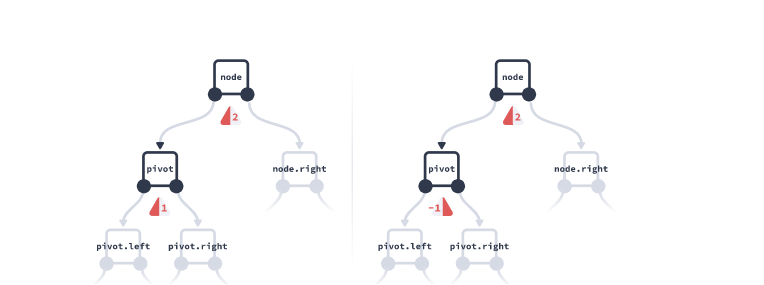

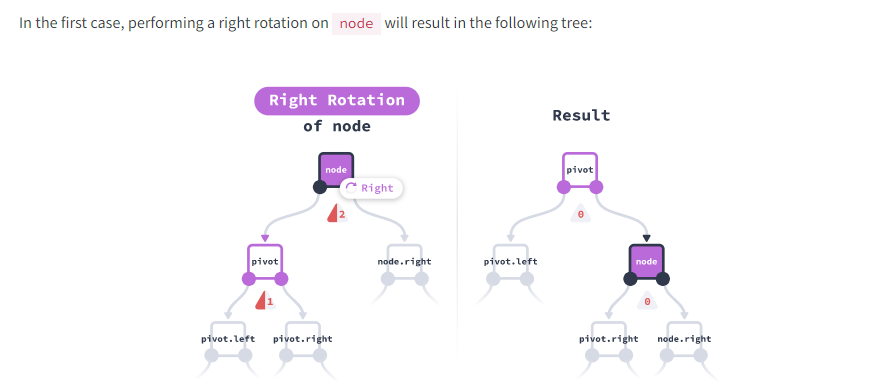

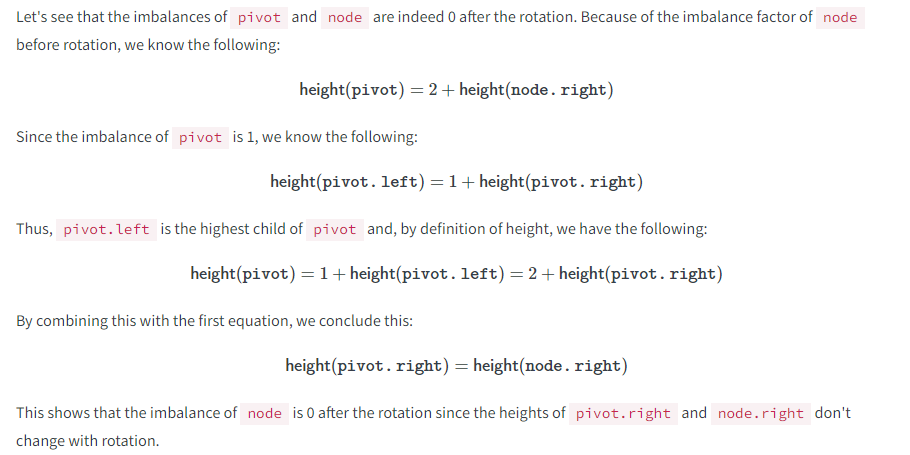

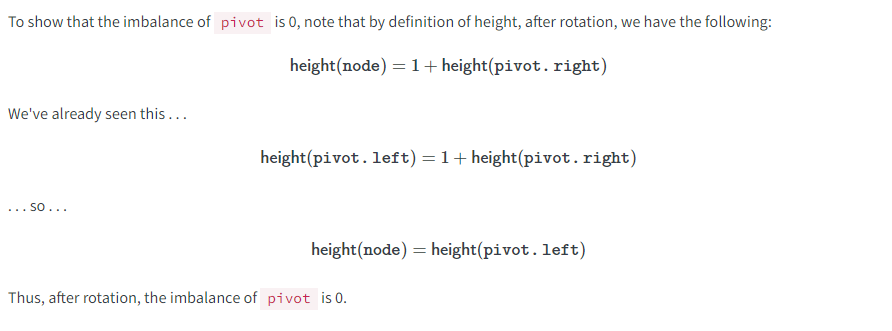

**Task**

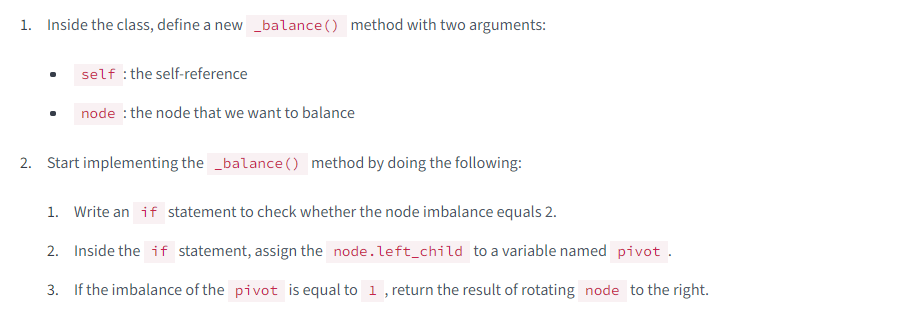

**Answer**

In [13]:
class AVLTree(BST):
    
    def __init__(self):
        super().__init__()
        
    def _add_recursive(self, current_node, value):
        if current_node is None:
            return AVLNode(value)
        if value <= current_node.value:
            current_node.left_child = self._add_recursive(current_node.left_child, value)
        else:
            current_node.right_child = self._add_recursive(current_node.right_child, value)
        current_node.calculate_height_and_imbalance() 
        return current_node
        
    def get_height(self):
        return self.root.height
    
    def _rotate_left(self, node):
        pivot = node.right_child
        node.right_child = pivot.left_child
        pivot.left_child = node
        node.calculate_height_and_imbalance()
        pivot.calculate_height_and_imbalance()
        return pivot
    
    def _rotate_right(self, node):
        pivot = node.left_child
        node.left_child = pivot.right_child
        pivot.right_child = node
        node.calculate_height_and_imbalance()
        pivot.calculate_height_and_imbalance()
        return pivot
    
    def _balance(self, node):
        if node.imbalance == 2:
            pivot = node.left_child
            if pivot.imbalance == 1:
                return self._rotate_right(node)

above we started to implement tree balancing. We learned that if the imbalance of a node is 2 and the imbalance of its left child is 1, then a right rotation of the node will restore the tree balance.

Now we'll explore the situation when the left child imbalance is -1, as we see in the following diagram:

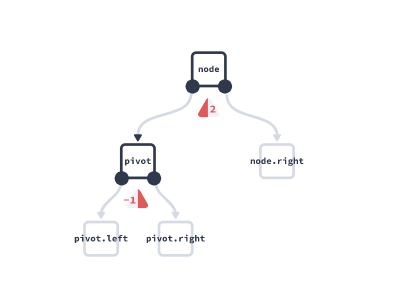

In this case, a single right rotation of `node` isn't enough, as we see in the following example:

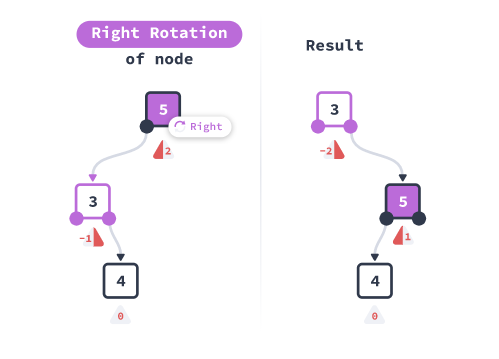

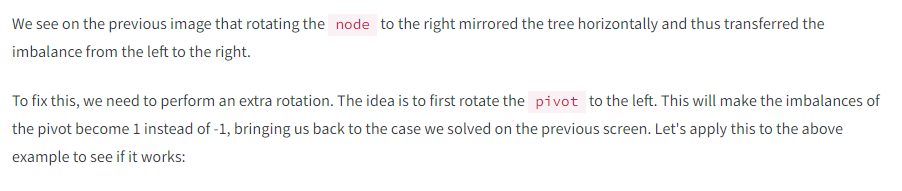

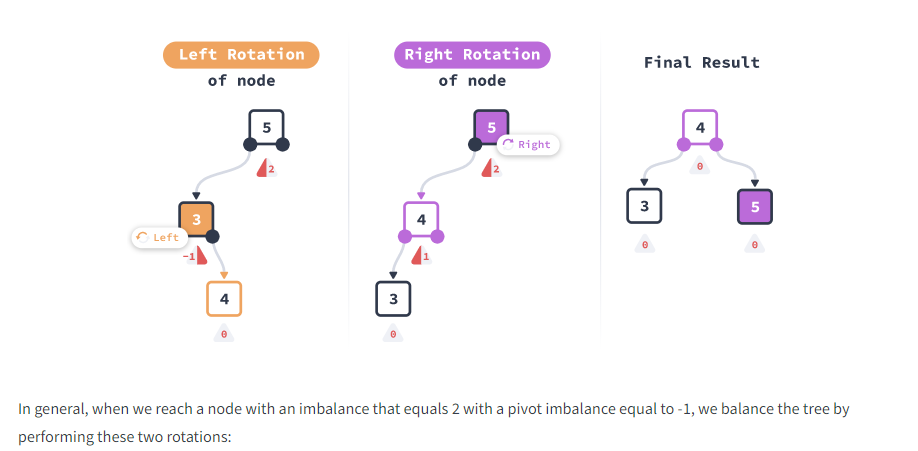

1. Rotate the `pivot` node to the left.
2. Rotate the `node` to the right.

**Task**

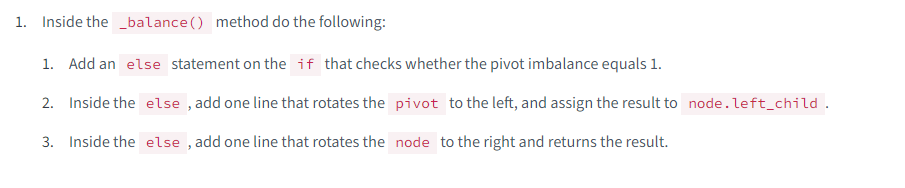

**Answer**

In [14]:
class AVLTree(BST):
    
    def __init__(self):
        super().__init__()
        
    def _add_recursive(self, current_node, value):
        if current_node is None:
            return AVLNode(value)
        if value <= current_node.value:
            current_node.left_child = self._add_recursive(current_node.left_child, value)
        else:
            current_node.right_child = self._add_recursive(current_node.right_child, value)
        current_node.calculate_height_and_imbalance() 
        return current_node
        
    def get_height(self):
        return self.root.height
    
    def _rotate_left(self, node):
        pivot = node.right_child
        node.right_child = pivot.left_child
        pivot.left_child = node
        node.calculate_height_and_imbalance()
        pivot.calculate_height_and_imbalance()
        return pivot
    
    def _rotate_right(self, node):
        pivot = node.left_child
        node.left_child = pivot.right_child
        pivot.right_child = node
        node.calculate_height_and_imbalance()
        pivot.calculate_height_and_imbalance()
        return pivot

    def _balance(self, node):
        if node.imbalance == 2:
            pivot = node.left_child
            if pivot.imbalance == 1:
                return self._rotate_right(node)
            # Add else here
            else:
                node.left_child = self._rotate_left(pivot)
                return self._rotate_right(node)

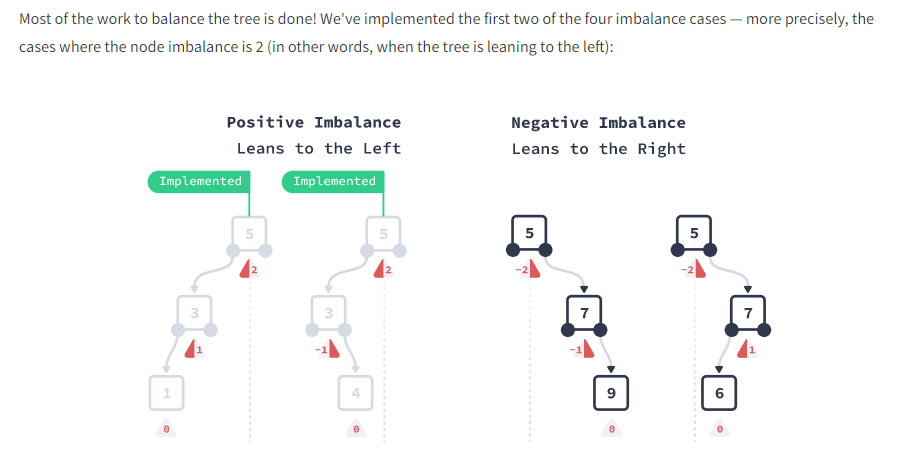

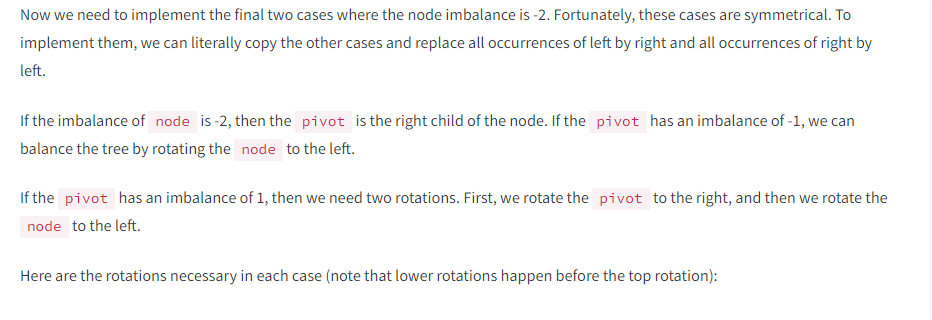

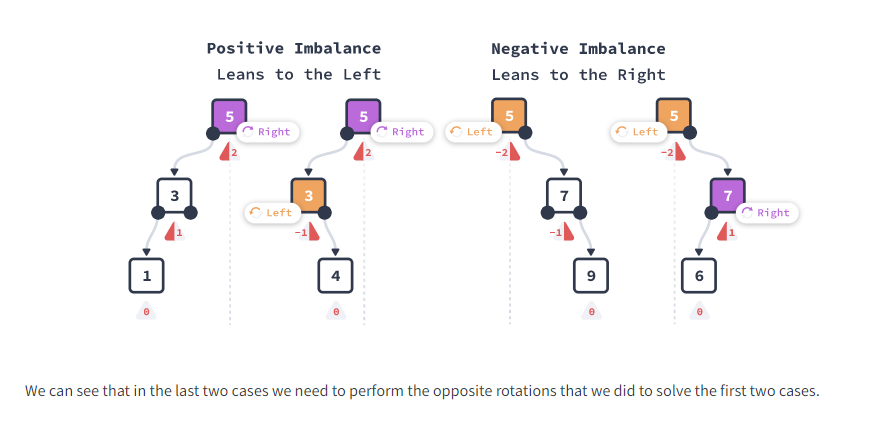

**Task**

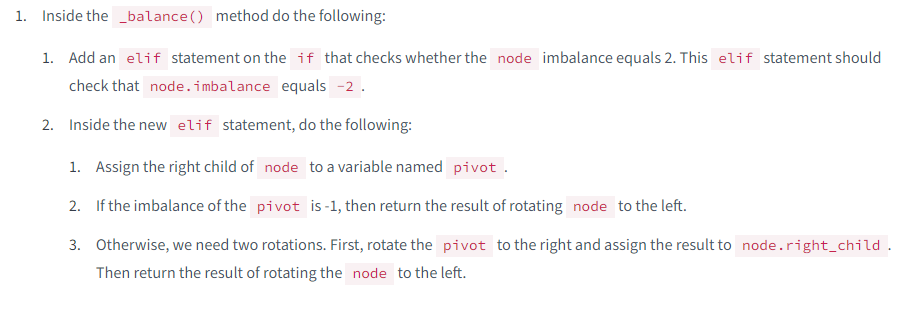

**Answer**

In [15]:
class AVLTree(BST):
    
    def __init__(self):
        super().__init__()
        
    def _add_recursive(self, current_node, value):
        if current_node is None:
            return AVLNode(value)
        if value <= current_node.value:
            current_node.left_child = self._add_recursive(current_node.left_child, value)
        else:
            current_node.right_child = self._add_recursive(current_node.right_child, value)
        current_node.calculate_height_and_imbalance() 
        return current_node
        
    def get_height(self):
        return self.root.height
    
    def _rotate_left(self, node):
        pivot = node.right_child
        node.right_child = pivot.left_child
        pivot.left_child = node
        node.calculate_height_and_imbalance()
        pivot.calculate_height_and_imbalance()
        return pivot
    
    def _rotate_right(self, node):
        pivot = node.left_child
        node.left_child = pivot.right_child
        pivot.right_child = node
        node.calculate_height_and_imbalance()
        pivot.calculate_height_and_imbalance()
        return pivot

    def _balance(self, node):
        if node.imbalance == 2:
            pivot = node.left_child
            if pivot.imbalance == 1:
                return self._rotate_right(node)
            else:
                node.left_child = self._rotate_left(pivot)
                return self._rotate_right(node)
        # Add elif code here
        elif node.imbalance == -2:
            pivot = node.right_child
            if pivot.imbalance == -1:
                return self._rotate_left(node)
            else:
                node.right_child = self._rotate_right(pivot)
                return self._rotate_left(node)

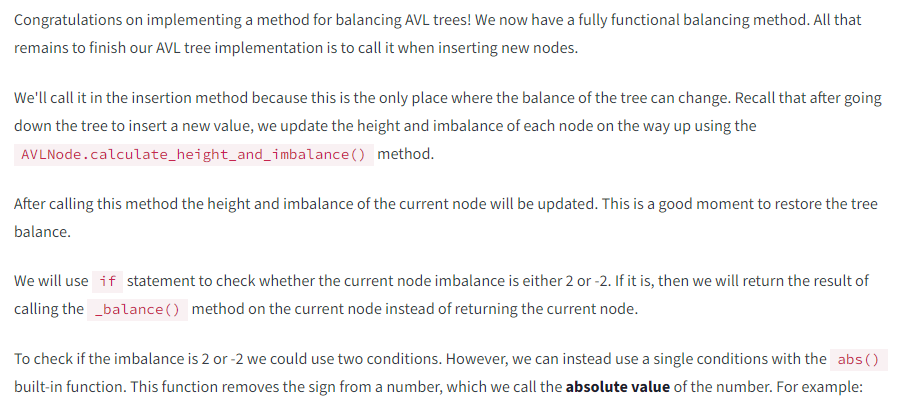

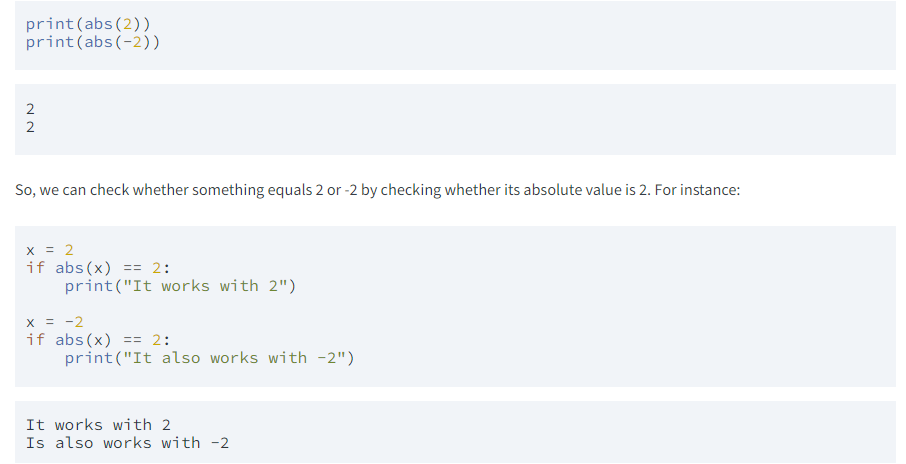

**Task**

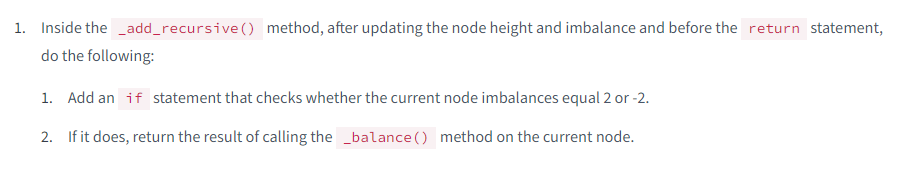

**Answer**

In [16]:
class AVLTree(BST):
    
    def __init__(self):
        super().__init__()
        
    def _add_recursive(self, current_node, value):
        if current_node is None:
            return AVLNode(value)
        if value <= current_node.value:
            current_node.left_child = self._add_recursive(current_node.left_child, value)
        else:
            current_node.right_child = self._add_recursive(current_node.right_child, value)
        current_node.calculate_height_and_imbalance() 
    
        if abs(current_node.imbalance) == 2:
            return self._balance(current_node)
        return current_node
        
    def get_height(self):
        return self.root.height
    
    def _rotate_left(self, node):
        pivot = node.right_child
        node.right_child = pivot.left_child
        pivot.left_child = node
        node.calculate_height_and_imbalance()
        pivot.calculate_height_and_imbalance()
        return pivot
    
    def _rotate_right(self, node):
        pivot = node.left_child
        node.left_child = pivot.right_child
        pivot.right_child = node
        node.calculate_height_and_imbalance()
        pivot.calculate_height_and_imbalance()
        return pivot

    def _balance(self, node):
        if node.imbalance == 2:
            pivot = node.left_child
            if pivot.imbalance == 1:
                return self._rotate_right(node)
            else:
                node.left_child = self._rotate_left(pivot)
                return self._rotate_right(node)
        else:
            pivot = node.right_child
            if pivot.imbalance == -1:
                return self._rotate_left(node)
            else:
                node.right_child = self._rotate_right(pivot)
                return self._rotate_left(node)

We've completed the AVL tree implementation!

It's a good practice to test our code to ensure that it works correctly. To encourage explore code testing, we don't provide with explicit instructions on how test it; rather, here is a list some things that we should test:

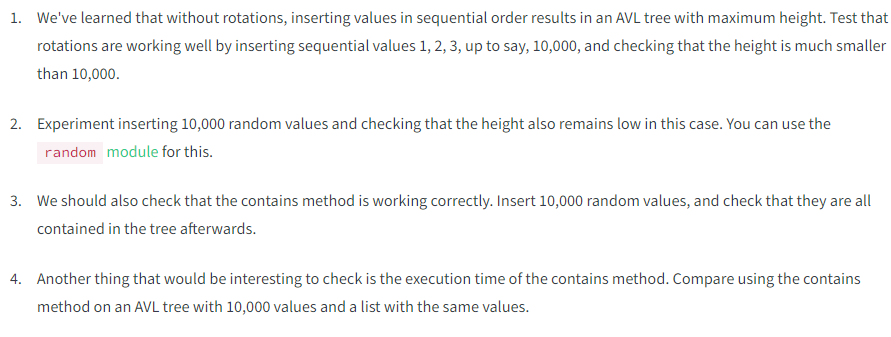

These are just a few ideas on things to test. 

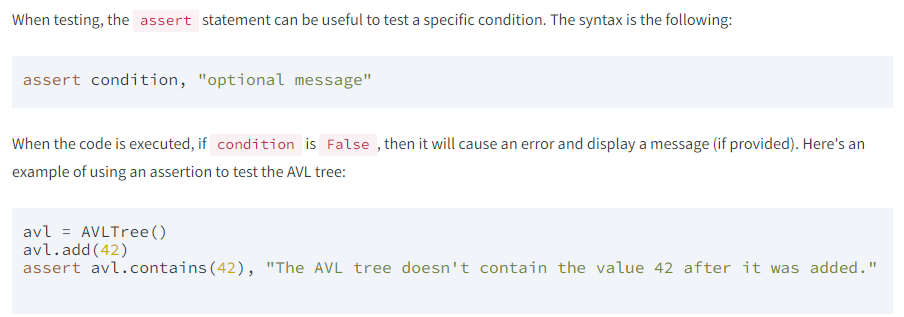

A more standard way to test code is to use the [`unittest` module](https://docs.python.org/3/library/unittest.html);

**Task**

Write some code to test our class and ensure it works as expected, both in terms of functionality and execution time.

**Answer**

14
16


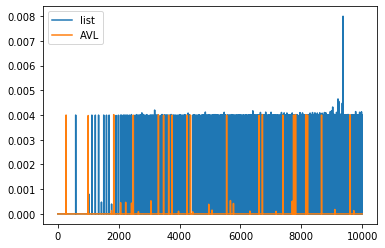

In [18]:
# The AVLTree class is available
NUM_VALUES = 10000

# Test height with sequential inserts, the height should be much smaller than NUM_VALUES
avl = AVLTree()
for i in range(NUM_VALUES):
    avl.add(i)
print(avl.root.height)

# Test height with random inserts, the height should be much smaller than NUM_VALUES
import random
random.seed(0)
rnd_values = [random.randint(1, 1000000) for _ in range(NUM_VALUES)]
avl = AVLTree()
for v in rnd_values:
    avl.add(v)
print(avl.root.height)

# Test contains method
for v in rnd_values:
    assert avl.contains(v)

# Compare runtime with list, AVL should be faster
import time
times_list = []
times_avl = []

for v in rnd_values:
    start = time.time()
    v in rnd_values
    end = time.time()
    times_list.append(end - start)
    
    start = time.time()
    avl.contains(v)
    end = time.time()
    times_avl.append(end - start)
    
import matplotlib.pyplot as plt
plt.plot(times_list, label="list")
plt.plot(times_avl, label="AVL")
plt.legend()
plt.show()

In this file, we learned how to implement AVL trees, which are self-balancing binary search trees. We've implemented a method to add values and one to check if it contains a given value. We didn't implement deletions because it would significantly increase the file length. We encourage to read about it and try to implement it.

We've implemented rotation operations to balance the tree and prevent the tree from growing too tall. It can be shown that the height of an AVL tree is at most 2 × log(N), where N is the number of nodes. If we're interested in a proof, we can find one [here](https://people.csail.mit.edu/alinush/6.006-spring-2014/avl-height-proof.pdf).

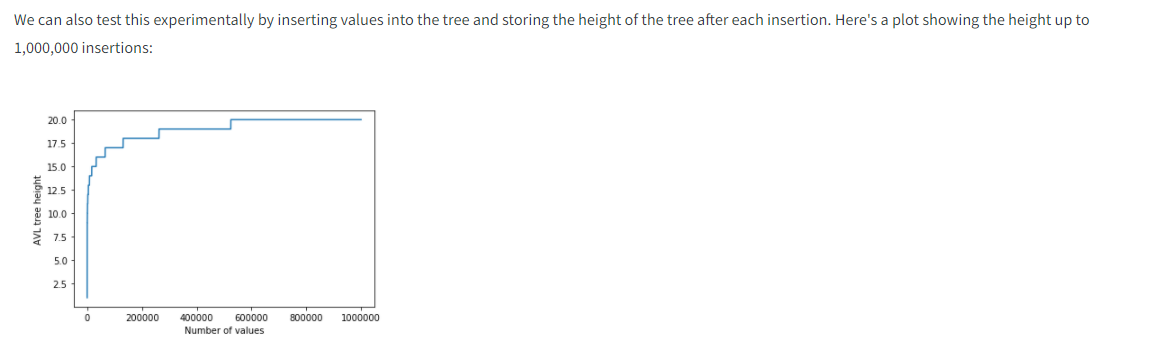

As we can see, even after 1,000,000 insertions the height of the tree is only 20.

In the following file, we'll study other kinds of tree data structures. We'll learn about Heaps which are suited for retrieving minimum values in a data set. Later we'll learn about B-trees, which are a good choice for implemented database indexes. This is the kind of data structure used by postgres.